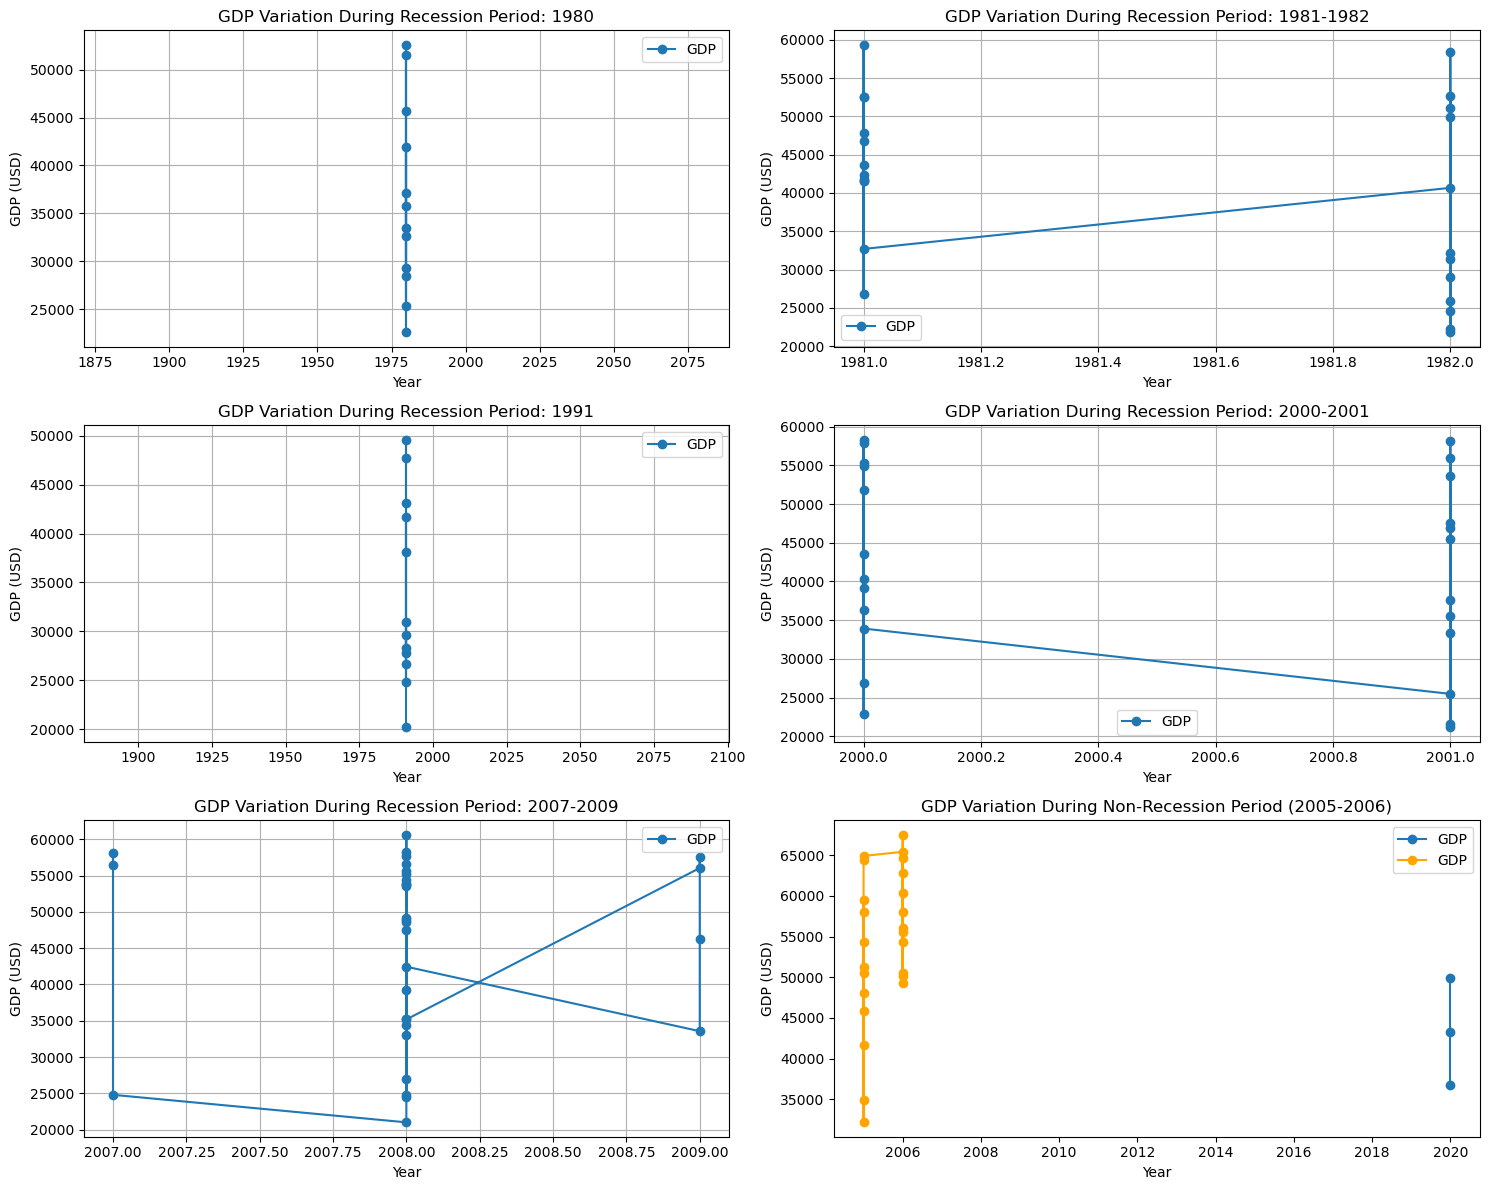

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming it has been created and saved as 'automobile_sales_data.csv')
df = pd.read_csv('automobile_sales_data.csv')

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the Date
df['Year'] = df['Date'].dt.year

# Define recession periods and non-recession periods
recession_periods = {
    '1980': df[df['Year'] == 1980],
    '1981-1982': df[(df['Year'] >= 1981) & (df['Year'] <= 1982)],
    '1991': df[df['Year'] == 1991],
    '2000-2001': df[(df['Year'] >= 2000) & (df['Year'] <= 2001)],
    '2007-2009': df[(df['Year'] >= 2007) & (df['Year'] <= 2009)],
    '2020': df[(df['Year'] == 2020) & (df['Month'].isin([2, 3, 4]))]
}

# Define non-recession periods for comparison
non_recession_periods = {
    '2005-2006': df[(df['Year'] >= 2005) & (df['Year'] <= 2006)],
}

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot GDP variations during recession periods
for i, (period_name, period_data) in enumerate(recession_periods.items()):
    axes[i].plot(period_data['Year'], period_data['GDP'], marker='o', label='GDP')
    axes[i].set_title(f'GDP Variation During Recession Period: {period_name}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('GDP (USD)')
    axes[i].grid()
    axes[i].legend()

# Plot GDP variations during non-recession periods
non_recession_data = non_recession_periods['2005-2006']
axes[5].plot(non_recession_data['Year'], non_recession_data['GDP'], marker='o', color='orange', label='GDP')
axes[5].set_title('GDP Variation During Non-Recession Period (2005-2006)')
axes[5].set_xlabel('Year')
axes[5].set_ylabel('GDP (USD)')
axes[5].grid()
axes[5].legend()

# Adjust layout
plt.tight_layout()

# Save the plot as an image
plt.savefig('GDP_Variation_Comparison.png')

# Show the plot
plt.show()
